In [11]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn_2d import *
import matplotlib.pyplot as plt


In [12]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

In [13]:
x, y = np.mgrid[-0.99:1.01:0.02, -0.99:1.01:0.02]
# x, y = np.mgrid[-1.0:1.00:0.02, -1.0:1.00:0.02]

In [14]:
e = np.ones(x.shape) * 2
e = make_tensor(e)

In [15]:
fpath = "./models/2d_plane_sur_prob1.data"
state_dict = torch.load(fpath)

points_x = [(-1.0, 1.0)]
points_y = [(-1.0, 1.0)]

# Set the number of domains
domain_no = len(points_x)

# Set the global left & right boundary of the calculation domain
global_lb_x = -1.0
global_rb_x = 1.0
global_lb_y = -1.0
global_rb_y = 1.0

# Initialize CPINN model
model = CPINN_2D_surrogate(domain_no, global_lb_x, global_rb_x, global_lb_y, global_rb_y, figure_path=None)

# to do
model.make_domains(points_x, points_y)
model.make_boundaries()

sample = {'Model{}'.format(i+1): PINN_surrogate(i) for i in range(domain_no)}
# sample = {'Model{}'.format(i+1): PINN_plate(i) for i in range(domain_no)}

model.module_update(sample)

model.load_state_dict(state_dict)

model = model.cuda()


[]


In [16]:
xy = torch.from_numpy(np.vstack((x.flatten(), y.flatten()))).type(torch.FloatTensor)
pred = model(xy[0].unsqueeze(0).T.cuda(), xy[1].unsqueeze(0).T.cuda(), e.flatten().type(torch.FloatTensor).unsqueeze(0).T.cuda())

Text(0.5, 1.0, 'w (m) by PINN')

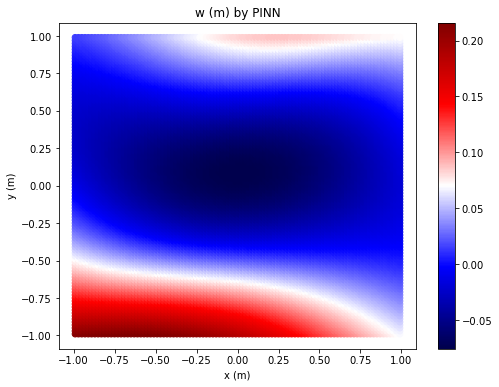

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=(((pred[:,0].cpu().detach().numpy()))), cmap='seismic')
plt.colorbar()
# plt.clim(0, 0.014)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("w (m) by PINN")